## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temperature values to "Temperature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temperature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change your present working directory

In [0]:
import os
os.chdir('/content/drive/My Drive/Topic wise labs/RNN')

### Load your data file

In [3]:
import pandas as pd

df = pd.read_csv('./daily-minimum-temperatures-in-me.csv', index_col='Date')
df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


#### Plot data

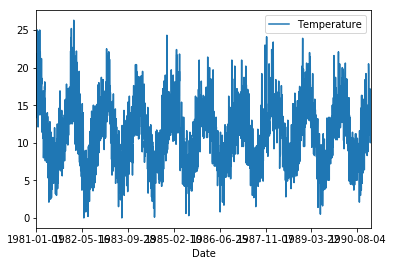

In [4]:
df.plot()

#### Descibe your dataframe

In [5]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [6]:
df.isnull().sum()

Temperature    0
dtype: int64

#### Drop null values

In [0]:
df.dropna(inplace=True)

#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9708e0cac8>]],
      dtype=object)

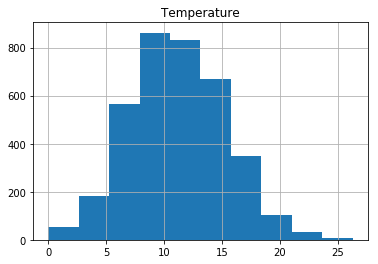

In [8]:
df.hist(bins=10)

#### Check the maximum and minimum values

In [9]:
import numpy as np
print('Min', np.min(df))
print('Max', np.max(df))

Min Temperature    0.0
dtype: float64
Max Temperature    26.3
dtype: float64


### Normalize the data

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)

#### Check the maximum and minimum values of scaled data

In [11]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


#### Look into some of the scaled values

In [12]:
print(scaled[:10])

[[0.78707224]
 [0.68060837]
 [0.7148289 ]
 [0.55513308]
 [0.60076046]
 [0.60076046]
 [0.60076046]
 [0.66159696]
 [0.82889734]
 [0.76045627]]


### Split data into Training and Testing

In [13]:
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


#### Print train and test size

In [14]:
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


## Create the sequential data
Map the temperature at a particular time t to the temperature at time t+n, where n is any number you define.

For example: to map temperatures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
def create_dataset(dataset, look_back=1):
    # print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print('temperature on day {}: {}'.format(i, a))
        print('temperature on day {}: {}'.format(i + look_back, dataset[i + look_back, 0]))
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [16]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

temperature on day 0: [0.78707224]
temperature on day 1: 0.6806083650190113
temperature on day 1: [0.68060837]
temperature on day 2: 0.714828897338403
temperature on day 2: [0.7148289]
temperature on day 3: 0.5551330798479087
temperature on day 3: [0.55513308]
temperature on day 4: 0.6007604562737643
temperature on day 4: [0.60076046]
temperature on day 5: 0.6007604562737643
temperature on day 5: [0.60076046]
temperature on day 6: 0.6007604562737643
temperature on day 6: [0.60076046]
temperature on day 7: 0.6615969581749048
temperature on day 7: [0.66159696]
temperature on day 8: 0.8288973384030418
temperature on day 8: [0.82889734]
temperature on day 9: 0.7604562737642585
temperature on day 9: [0.76045627]
temperature on day 10: 0.6159695817490494
temperature on day 10: [0.61596958]
temperature on day 11: 0.5057034220532319
temperature on day 11: [0.50570342]
temperature on day 12: 0.6349809885931559
temperature on day 12: [0.63498099]
temperature on day 13: 0.8174904942965779
tempera

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2553, 1, 1)
(1093, 1, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
batch_size = 1
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


### Summarize your model

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [20]:
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 3s - loss: 0.0400
Epoch 2/100
 - 3s - loss: 0.0186
Epoch 3/100
 - 3s - loss: 0.0159
Epoch 4/100
 - 3s - loss: 0.0147
Epoch 5/100
 - 3s - loss: 0.0131
Epoch 6/100
 - 3s - loss: 0.0112
Epoch 7/100
 - 3s - loss: 0.0107
Epoch 8/100
 - 3s - loss: 0.0107
Epoch 9/100
 - 3s - loss: 0.0106
Epoch 10/100
 - 3s - loss: 0.0104
Epoch 11/100
 - 3s - loss: 0.0104
Epoch 12/100
 - 3s - loss: 0.0103
Epoch 13/100
 - 3s - loss: 0.0101
Epoch 14/100
 - 3s - loss: 0.0103
Epoch 15/100
 - 3s - loss: 0.0102
Epoch 16/100
 - 3s - loss: 0.0101
Epoch 17/100
 - 3s - loss: 0.0102
Epoch 18/100
 - 3s - loss: 0.0101
Epoch 19/100
 - 3s - loss: 0.0102
Epoch 20/100
 - 3s - loss: 0.0102
Epoch 21/100
 - 3s - loss: 0.0102
Epoch 22/100
 - 3s - loss: 0.0102
Epoch 23/100
 - 3s - loss: 0.0101
Epoch 24/100
 - 3s - loss: 0.0101
Epoch 25/100
 - 3s - loss: 0.0101
Epoch 26/100
 - 3s - loss: 0.0101
Epoch 27/100
 - 3s - loss: 0.0102
Epoch 28/100
 - 3s - loss: 0.0101
Epoch 29/

## Make Predictions and Evaluate your model

In [21]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)

model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.68 RMSE
Test Score: 2.56 RMSE


## Plot the results

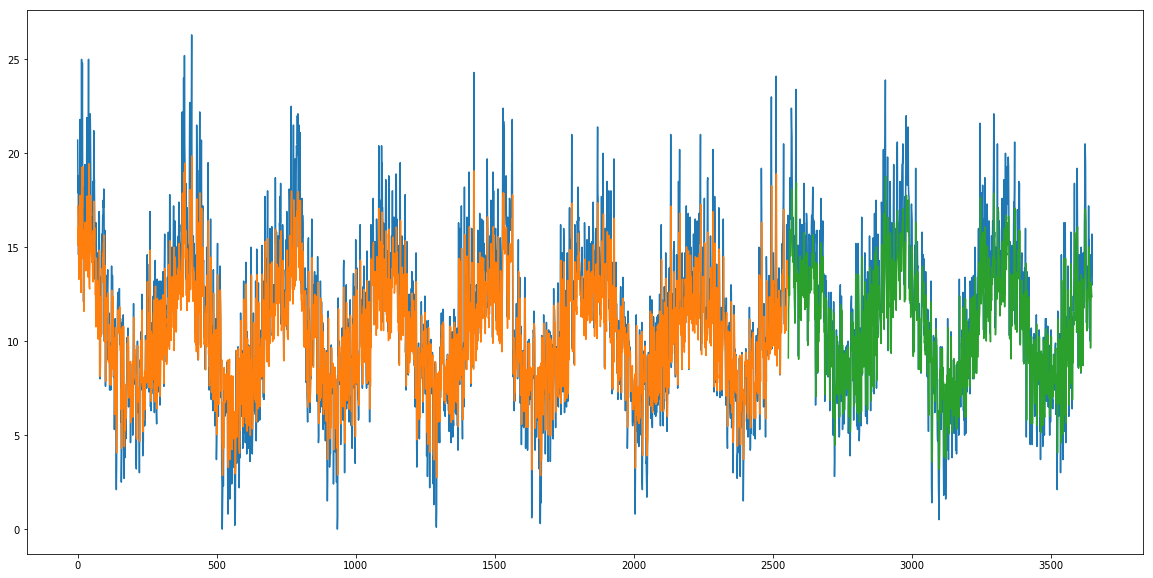

In [22]:
from matplotlib import pyplot as plt

trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()